In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [118]:
def readData_rawSMS(filepath):
    data_rawSMS = pd.read_csv(filepath, header=0, usecols=[0,1], encoding='latin-1')
    data_rawSMS.columns = ['label', 'content']
    return data_rawSMS

data_rawSMS = readData_rawSMS(os.path.join(dirname, filename))
data_rawSMS.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
data_rawSMS.describe()

,label,content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [120]:
data_rawSMS.groupby('label').describe()

content                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [121]:
data_rawSMS['length'] = data_rawSMS['content'].apply(len)
data_rawSMS.head()

,label,content,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [122]:
data_rawSMS.groupby('label').describe()

ValueError: Invalid format specifier

ValueError: Invalid format specifier

In [123]:
data_rawSMS[data_rawSMS.label == 'ham']

,label,content,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
...,...,...,...
5565,ham,Huh y lei...,12
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_style('whitegrid')
plt.style.use('ggplot')

plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Message Length')

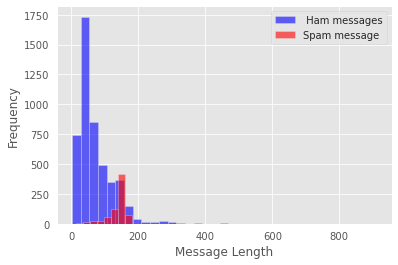

In [125]:
data_rawSMS[data_rawSMS.label == 'ham'].length.plot(
    bins = 35, kind = 'hist', color = 'blue',
    label = ' Ham messages', alpha = 0.6)
data_rawSMS[data_rawSMS.label == 'spam'].length.plot(
    kind = 'hist', color = 'red',
    label = 'Spam message', alpha = 0.6)

plt.legend()
plt.xlabel('Message Length')

In [126]:
data_rawSMS[data_rawSMS.label == 'spam'].describe()

ValueError: Invalid format specifier

ValueError: Invalid format specifier

In [127]:
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [128]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [129]:
def text_process(mess):
    CustomStopwords = ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    STOPWORDS = stopwords.words('english') + CustomStopwords
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS])

data_rawSMS['clean_msg'] = data_rawSMS.content.apply(text_process)
data_rawSMS.head()

,label,content,length,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though


In [130]:
data_rawSMS['label_num'] = data_rawSMS.label.map({'ham': 0, 'spam': 1})
data_rawSMS.head()

,label,content,length,clean_msg,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts 21s...,1
3,ham,U dun say so early hor... U c already then say...,49,dun say early hor c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though,0


In [131]:
from collections import Counter

def get_words(content):
    words = []
    for row in content:
        for j in row.split():
            words.append(j.strip())
    return words

counter = Counter(get_words(data_rawSMS['clean_msg']))
most_common = dict(counter.most_common(20))
print(most_common)

{'call': 576, 'get': 386, 'go': 278, 'ok': 277, 'ltgt': 276, 'free': 275, 'know': 257, 'like': 242, 'got': 238, 'ill': 237, 'good': 234, 'come': 226, 'time': 208, 'day': 202, 'love': 195, 'want': 192, 'send': 190, 'text': 188, 'going': 171, 'one': 170}


<AxesSubplot:>

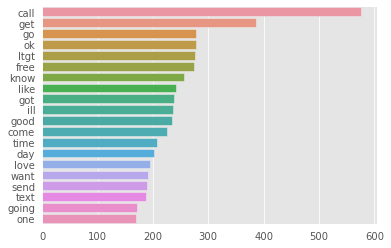

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = list(most_common.values()), y = list(most_common.keys()))

In [133]:
from collections import Counter

words = data_rawSMS[data_rawSMS.label == 'spam'].clean_msg.apply(lambda x: [word for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [134]:
X = data_rawSMS.clean_msg
y = data_rawSMS.label_num
print('clean_msg的總筆數:{}'.format(X.shape))
print('label_num的總筆數:{}'.format(y.shape))

clean_msg的總筆數:(5572,)
label_num的總筆數:(5572,)


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y , random_state = 0, train_size = 0.8)
print('X_train')
print(X_train,'\n')
print('X_test')
print(X_test,'\n')
print('y_train')
print(y_train,'\n')
print('y_test')
print(y_test,'\n')

X_train
1114       nothis kallis home groundamla home town durban
3589           escape theatre going watch kavalan minutes
3095    walked moms right stagwood pass right winterst...
1012                           dunno close oredi ìï v fan
3320                                     yo right yo work
                              ...                        
4931                              match startedindia ltgt
3264    44 7732584351 want new nokia 3510i colour phon...
1653    bugis juz wat walking home oredi ìï late reply...
2607            yeah lol luckily didnt starring role like
2732        dare stupid wont tell anything hear wont talk
Name: clean_msg, Length: 4457, dtype: object 

X_test
4456                        aight plan come later tonight
690                                             farm open
944     sent scores sophas secondary application schoo...
3768    gr8 see message r leaving congrats dear school...
1189                      case guess ill see campus lodge
          

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_tf = vect.fit_transform(X_train)

In [137]:
pd.DataFrame(X_train_tf.toarray(), columns = vect.get_feature_names())

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02072069400,...,åòits,åôrents,ìll,ìï,ìïll,ûthanks,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_tf)
X_train_tfidf = tfidf_transformer.transform(X_train_tf)

In [139]:
pd.options.display.float_format = '{:,.4f}'.format
    
pd.DataFrame([tfidf_transformer.idf_], columns = vect.get_feature_names())

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02072069400,...,åòits,åôrents,ìll,ìï,ìïll,ûthanks,ûï,ûïharry,ûò,ûówell
0,8.3038,8.7093,8.7093,8.7093,8.3038,8.7093,8.7093,7.7930,8.3038,8.7093,...,8.7093,8.7093,8.7093,5.7915,8.7093,8.7093,8.7093,8.7093,7.6107,8.7093


In [140]:
pd.options.display.float_format = '{:,.10f}'.format

pd.DataFrame(X_train_tfidf.toarray(), columns = vect.get_feature_names())

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02072069400,...,åòits,åôrents,ìll,ìï,ìïll,ûthanks,ûï,ûïharry,ûò,ûówell
0,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
1,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
2,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
3,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.3839798817,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
4,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
4453,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
4454,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.2362246265,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
4455,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000


In [141]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, oob_score=True, random_state=0)
%time clf = rf.fit(X_train_tfidf, y_train)

CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 244 ms


In [142]:
print("使用袋外數據(驗證集)測得的分數:", rf.oob_score_)

使用袋外數據(驗證集)測得的分數: 0.9685887368184878


In [143]:
sorted(zip(rf.feature_importances_, vect.get_feature_names()), reverse = True)[0:10]

[(0.03208769475397031, 'call'),
 (0.03009187209886268, 'txt'),
 (0.026421942886505668, 'stop'),
 (0.022712736132855703, 'claim'),
 (0.021208908882061117, 'free'),
 (0.019173775412939704, 'mobile'),
 (0.0161211499795171, 'nokia'),
 (0.015262506258600202, 'reply'),
 (0.013336643881804073, '500'),
 (0.013154469561045028, 'text')]

In [145]:
SMS = 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.'
clean_text = text_process(SMS)

simple_test_tf = vect.transform([clean_text])

y_predSimpleTest_class = rf.predict(simple_test_tf.reshape(1,-1))

if int(y_predSimpleTest_class) == 1:
    print ('SPAM: ()'.format(SMS))
else:
    print ('ham: {}'.format(SMS))

ham: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.


In [146]:
from sklearn.metrics import confusion_matrix

y_predTest_class= rf.predict(vect.transform(X_test))
confusion_matrix(y_test, y_predTest_class)



45
2078                         85233 freeringtonereply real
15      xxxmobilemovieclub use credit click wap link n...
348     fancy shag dointerested sextextukcom txt xxuk ...
1892    call 09090900040 listen extreme dirty live cha...
3753    bloomberg message center 447797706009 wait app...
304     sms ac blind date 4u rodds1 21m aberdeen unite...
4966    donate å£250 unicefs asian tsunami disaster su...
1457    claire havin borin time alone wanna cum 2nite ...
4963    dear voucher holder next meal us use following...
4067    tbspersolvo chasing us since sept forå£38 defi...
5566    reminder o2 get 250 pounds free call credit de...
5381                       1 new message call 02070836089
5492    marvel mobile play official ultimate spiderman...
3883    link picture sent also use httpalto18coukwavew...
1939    people dogging area call 09090204448 join like...
138     youll rcv msgs chat svc free hardcore services...
2294                1 new message please call 08718738034
2939       

In [ ]:
### Type I error (嚴重)###
# Predict: Ham=9 & Actual: Spam=1

print(len(X_test[(y_predTest_class==0) & (y_test==1)]))
print(X_test[(y_predTest_class==0) & (y_test==1)])

In [147]:
from sklearn.metrics import accuracy_score

y_predTest_class = rf.predict(vect.transform(X_test))

print('Accuracy score: {}'.format(accuracy_score(y_test, y_predTest_class)))

Accuracy score: 0.9596412556053812


In [148]:
from sklearn.metrics import recall_score

y_predTest_class= rf.predict(vect.transform(X_test))

print('Recall score: {}'.format(recall_score(y_test, y_predTest_class)))

Recall score: 0.7289156626506024


In [149]:
from sklearn.metrics import precision_score

y_predTest_class = rf.predict(vect.transform(X_test))

print('Precision score: {}'.format(precision_score(y_test, y_predTest_class)))

Precision score: 1.0


In [150]:
from sklearn.metrics import f1_score

y_predTest_class = rf.predict(vect.transform(X_test))
print('F1 score: {}'.format(f1_score(y_test, y_predTest_class)))

F1 score: 0.8432055749128919
